In [48]:
# Importing Essential libraries
import pandas as pd
import numpy as np

# loading the dataset
df = pd.read_csv("Spam SMS Collection", sep='\t', names=['label','message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Data Analysis (EDA)

* Exploring NAN values in the dataset
* Plotting countplots for SPAM vs HAM

In [49]:
df.shape

(5572, 2)

In [50]:
df.columns

Index(['label', 'message'], dtype='object')

In [51]:
df.dtypes

label      object
message    object
dtype: object

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


**Observation:**  We can see that there are no NAN values in the dataset.

In [53]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [54]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [55]:
# mapping values for the label
df["label"] = df['label'].map({'ham': 0, 'spam': 1})

In [56]:
df['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

In [57]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

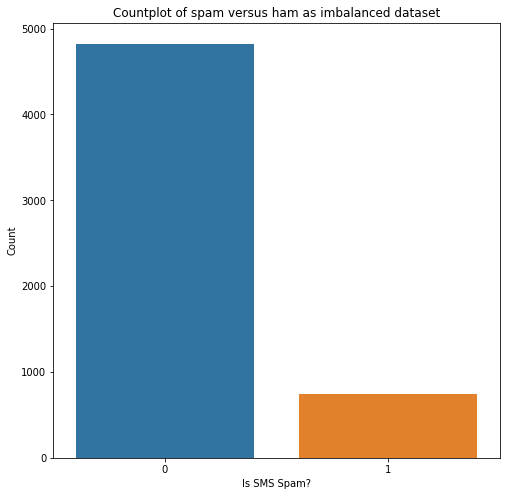

In [59]:
# Countplot for spam versus ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title("Countplot of spam versus ham as imbalanced dataset")
p = plt.xlabel("Is SMS Spam?")
p = plt.ylabel("Count")

**Observation:** We can see clearly that the dataset is imbalanced

# Feature Engineering

* Handling imbalanced dataset using Oversampling
* Creating new features e.g. word_count, contains_currency_symbol, contains_numbers, etc.

In [60]:
# handling imbalanced data with oversampling
only_spam = df[df['label'] == 1]
print("Number of spam records: {}".format(len(only_spam)))
print("Number of ham records: {}".format(len(df[df['label']==0])))

Number of spam records: 747
Number of ham records: 4825


In [61]:
count = int((df.shape[0] - only_spam.shape[0]) / only_spam.shape[0])
for i in range(0, count-1):
    df = pd.concat([df, only_spam])
df.shape

(9307, 2)

Text(0,0.5,'Count')

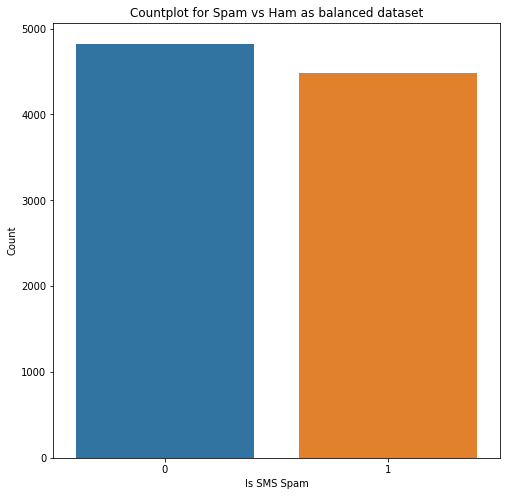

In [62]:
# Countplot for Spam vs Ham as balanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
plt.title("Countplot for Spam vs Ham as balanced dataset")
plt.xlabel("Is SMS Spam")
plt.ylabel("Count")

In [63]:
# Creating new feature word_count
df["word_count"] = df['message'].apply(lambda x: len(x.split()))

In [64]:
df.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


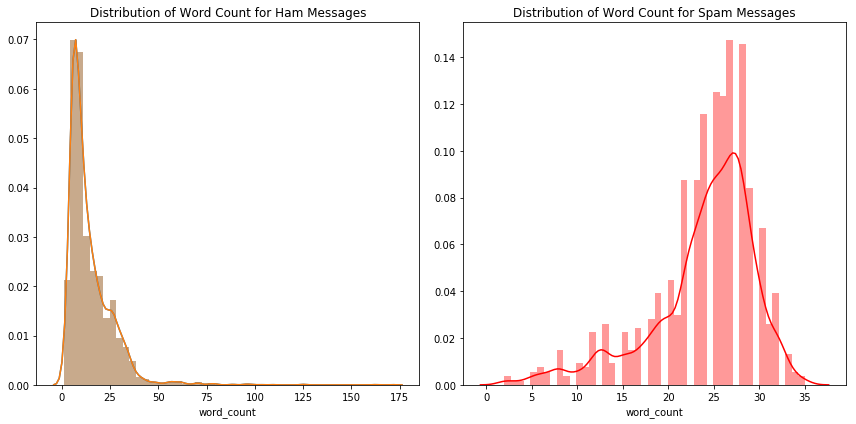

In [65]:
plt.figure(figsize=(12,6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1,2,1)
g = sns.distplot(a=df[df['label']==0].word_count)
g = sns.distplot(a=df[df['label']==0].word_count)
p = plt.title("Distribution of Word Count for Ham Messages")

# 1-row, 2-column, go to the second subplot
plt.subplot(1,2,2)
g = sns.distplot(a=df[df['label'] == 1].word_count, color='red')
p = plt.title("Distribution of Word Count for Spam Messages")

plt.tight_layout()
plt.show()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


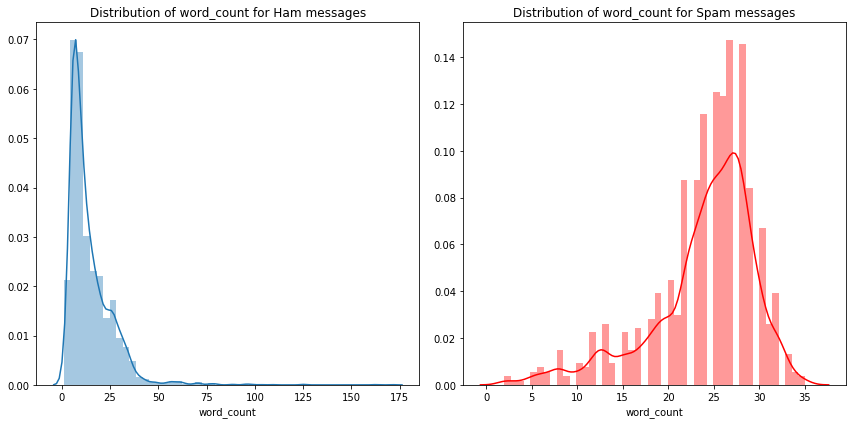

In [66]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['label']==0].word_count)
p = plt.title('Distribution of word_count for Ham messages')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['label']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()

**Observation**: 

**Ham messages** word count range **below 25 words** whereas **Spam  messages** word count range between **15 to 30 words.**

In [67]:
# Creating features containing Currency symbols
def currency(x):
    currency_symbols = ['€', '$', '¥', '£', '₹']
    for i in currency_symbols:
        if i in x:
            return 1
    return 0

df["contains_currency_symbol"] = df['message'].apply(currency)
    

In [68]:
df.tail()

,label,message,word_count,contains_currency_symbol
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0
5567,1,This is the 2nd time we have tried 2 contact u...,30,1


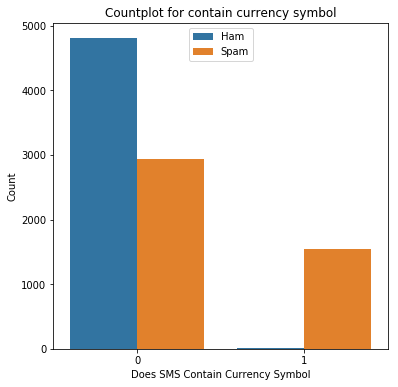

In [69]:
# Countplot for messages containing currency symbol
plt.figure(figsize=(6,6))
g = sns.countplot(x='contains_currency_symbol', data=df, hue='label')
plt.title('Countplot for contain currency symbol')
plt.xlabel("Does SMS Contain Currency Symbol")
plt.ylabel("Count")
plt.legend(labels=['Ham','Spam'],loc=9)

**Observation**: About 1/3 of the spam messages have currency symbols, whereas currency symbols are rarely found in ham messages

In [70]:
# Create feature contains number
def numbers(x):
    for i in x:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0 

df["contains_number"] = df['message'].apply(numbers)

In [71]:
df.head()

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


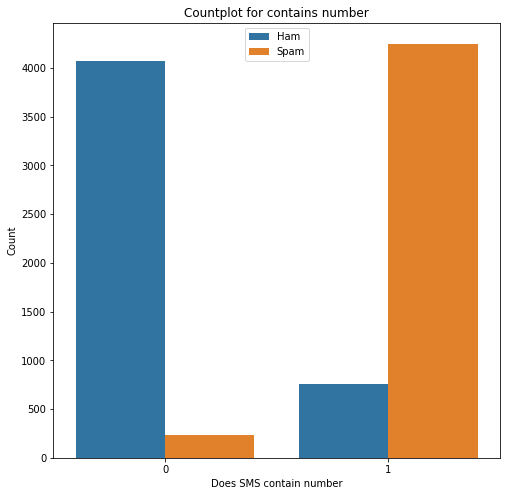

In [72]:
# countplot for contains number
plt.figure(figsize=(8,8))
g = sns.countplot(x="contains_number", data=df, hue='label')
plt.title("Countplot for contains number")
plt.xlabel("Does SMS contain number")
plt.ylabel("Count")
plt.legend(labels=["Ham", "Spam"], loc=9)

**Observations**: Majority of Spam messages contains numbers, and Ham messages rarely contain numbers

# Data Cleaning

* Removing special characters and numbers using regular expression
* Converting the entire SMS into lower case
* Tokenizing the SMS by words
* Removing the stop words
* Lemmatizing the words
* Joining the lemmatized words
* Building a corpus of words

In [73]:
# importing essential libraries for performing Natural Language Processing on 'SMS Spam Collection' Dataset
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\97156\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\97156\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [74]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df['message']):
    # cleaning special characters from the SMS
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)
    
    # converting entire SMS to lower case
    message = message.lower()
    
    # Tokenizing the SMS by words
    words = message.split()
    
    # Removing the stop words
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    
    # Lemmatizing the words
    lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]
    
    # joining the lemmatized words
    message = ' '.join(lemmatized_words)
    
    # Building a corpus of messages
    corpus.append(message)

In [75]:
corpus[0:3]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']

In [76]:
# Creating Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']

print(X.shape)
print(y.shape)

(9307, 500)
(9307,)


# Model Building and Evaluation

** Metric: F1-Score **

* Multinomial Naive Bayes: 0.943
* Decision Tree: 0.98
* **Random Forest (Ensemble): 0.994**
* Voting (Multinomial Naive Bayes + Decision Tree): 0.98

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Fitting Naive Bayes to Training Set
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print("--- Average F1-Score for MNB model: {} ---".format(round(cv.mean(),3)))
print("--- Standard Deviation: {} ---".format(round(cv.std(),3)))

--- Average F1-Score for MNB model: 0.943 ---
--- Standard Deviation: 0.004 ---


In [80]:
# Classification report for MNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print("--- Classification report for MNB model ---")
print(classification_report(y_test, y_pred))

--- Classification report for MNB model ---
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

   micro avg       0.94      0.94      0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



Text(0.5,1,'Confusion Matrix for Multinomial Naive Bayes Model')

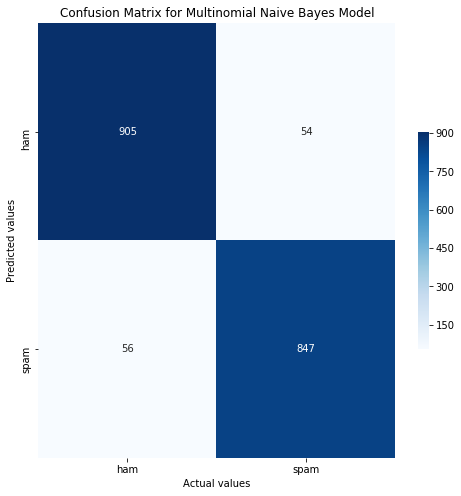

In [81]:
# Confusion matrix of MNB model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
axis_labels = ["ham", "spam"]
g = sns.heatmap(data=cm, annot=True, cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink":0.5})
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Confusion Matrix for Multinomial Naive Bayes Model")
                                                                                                                   

In [82]:
# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring='f1', cv=10)
print("Average F1-score for Decision Tree Model: {}".format(round(cv.mean(),3)))
print("Standard deviation: {}".format(round(cv.std(),3)))

Average F1-score for Decision Tree Model: 0.981
Standard deviation: 0.004


In [83]:
# Classification report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("--- Classification Report for Decision Tree Model ---")
print(classification_report(y_test, y_pred))

--- Classification Report for Decision Tree Model ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       959
           1       0.97      1.00      0.98       903

   micro avg       0.98      0.98      0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



Text(51,0.5,'Predicted Values')

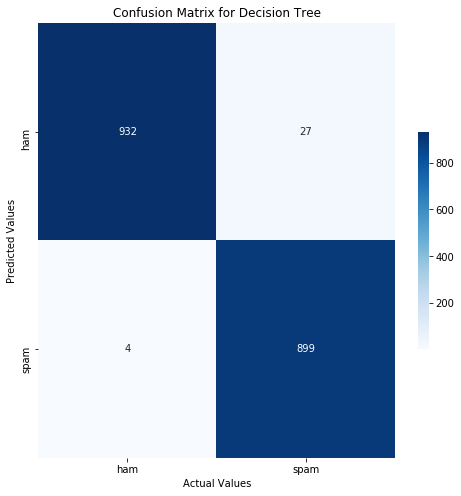

In [84]:
# Confusion Matrix of Decision Tree Model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
axis_labels=['ham','spam']
g = sns.heatmap(data=cm, annot=True, xticklabels=axis_labels, yticklabels=axis_labels, cmap='Blues', fmt='g', cbar_kws={"shrink":0.5})
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [85]:
# Fitting Random Forest to Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
cv = cross_val_score(rf, X, y, scoring='f1', cv=10)
print("Average F1-Score of Random Forest model: {}".format(round(cv.mean(),3)))
print("Standard Deviation: {}".format(round(cv.std(),3)))


Average F1-Score of Random Forest model: 0.994
Standard Deviation: 0.003


In [86]:
# Classification report for Random Forest model
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("--- Classification Report of Random Forest Model ---")
print(classification_report(y_test, y_pred))

--- Classification Report of Random Forest Model ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       959
           1       0.99      1.00      0.99       903

   micro avg       0.99      0.99      0.99      1862
   macro avg       0.99      0.99      0.99      1862
weighted avg       0.99      0.99      0.99      1862



Text(51,0.5,'Predicted Value')

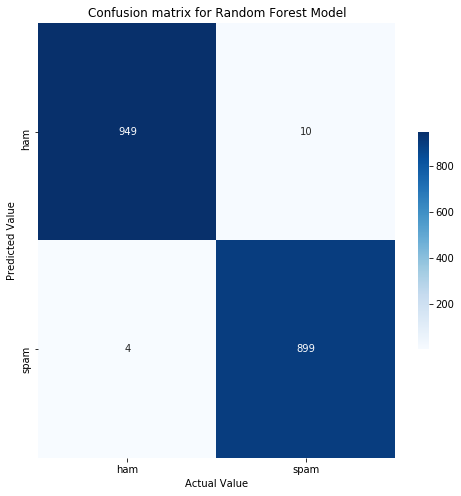

In [87]:
# Confusion matrix of Random Forest Model
cm = confusion_matrix(y_test, y_pred)
axis_labels =['ham', 'spam']
plt.figure(figsize=(8,8))
g = sns.heatmap(data=cm, cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', annot=True, cbar_kws={"shrink": 0.5})
plt.title("Confusion matrix for Random Forest Model")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

**NOTE:** Let us try Decision Tree & MNB algorithms and feed it to voting algorithm to increase the F1 Score

In [88]:
# Fitting Decision Tree and MNB to VotingClassifier
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('decision_tree', dt), ('m_naive_bayes', mnb)], weights=[2,1])
cv = cross_val_score(vc, X, y, scoring='f1', cv=10)
print("Average F1-Score for Voting Classifier Model: {}".format(round(cv.mean(),3)))
print("Standard Deviation: {}".format(round(cv.std(),3)))

Average F1-Score for Voting Classifier Model: 0.98
Standard Deviation: 0.003


**NOTE:** VotingClassifier algorithm didnt out perform Random Forest algorithm, hence **Random Forest Algorithm is selected for predicting the results of this problem statement.**

# Making Predictions

In [89]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    final_message = [wnl.lemmatize(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    
    temp = tfidf.transform([final_message]).toarray()
    return rf.predict(temp)

In [90]:
# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


In [91]:
# Prediction 2 - Casual text chat
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


In [92]:
# Prediction 3 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


In [93]:
# Predicting values 4 - Feedback message
sample_message = 'Tammy, thanks for choosing Carl’s Car Wash for your express polish. We would love to hear your thoughts on the service. Feel free to text back with any feedback. Safe driving!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


# Final 'Random Forest' Model for Deployment

In [94]:
import pandas as pd
import pickle

# Loading the dataset
df = pd.read_csv("Spam SMS Collection", sep="\t", names=['label', 'message'])

# mapping values for the label
df["label"] = df["label"].map({'ham': 0, 'spam': 1})

# handling imbalanced data with oversampling
spam_data = df[df['label'] == 1]
count = int((df.shape[0] - spam_data.shape[0]) / spam_data.shape[0])
for i in range(0, count - 1):
    df = pd.concat([df, spam_data])

# Importing essential Libraries for NLP and data cleaning
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# cleaning the message
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df['message']):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)
    message = message.lower()
    words = message.split()
    words = [word for word in words if word not in set(stopwords.words('english'))]
    words = [wnl.lemmatize(word) for word in words]
    message = ' '.join(words)
    corpus.append(message)

# Creating the Bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']

# Creating a pickle file for the CountVectorizer
pickle.dump(tfidf, open('tfidf-transform.pkl', 'wb'))

# Model Building
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Fitting Random Forest to train data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit(X_train, y_train)

# Creating a pickle file for Random Forest Model
pickle.dump(classifier, open('spam-sms-rfc-model.pkl', 'wb'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\97156\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\97156\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
